In [42]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [43]:
#Data Description 

#   Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
#   Highly Malignant: It denotes comments that are highly malignant and hurtful. 
#   Rude: It denotes comments that are very rude and offensive.
#  Threat: It contains indication of the comments that are giving any threat to someone. 	
#  Abuse: It is for comments that are abusive in nature. 
#  Loathe: It describes the comments which are hateful and loathing in nature.  
#  ID: It includes unique Ids associated with each comment text given.   
#  Comment text: This column contains the comments extracted from various social media platforms. 


In [44]:
#Loading  PFA Malignant-Comments Train  Database
Train=pd.read_csv('PFA_train.csv')
Train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [45]:
#Loading  PFA Malignant-Comments Test   Database
Test=pd.read_csv('PFA_test.csv')
Test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [46]:
# Name of the Train database columns
Train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [47]:
# Shape of the database 
print("Train Database Shape")
print(Train.shape)
print("Test Database Shape")
print(Test.shape)

Train Database Shape
(159571, 8)
Test Database Shape
(153164, 2)


In [48]:
#information of the database
print("Train Database")
print("    ")
print(Train.info())
print("Test Database")
print("    ")
print(Test.info())

Train Database
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
Test Database
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None

In [49]:
#finding null values in the database
print("Train Database null  values ")
print("    ")
print(Train.isnull().sum())
print("    ")
print("Test Database null  values ")
print("    ")
print(Test.isnull().sum())

Train Database null  values 
    
id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
    
Test Database null  values 
    
id              0
comment_text    0
dtype: int64


                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


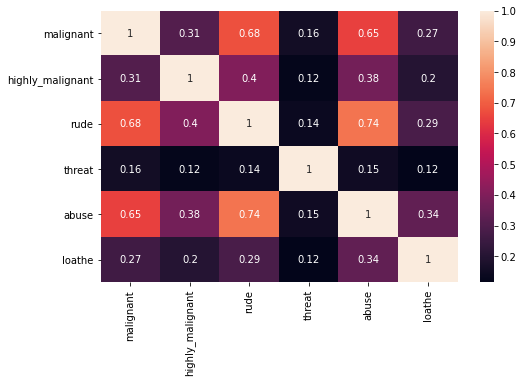

In [50]:
## checking correlation in Train dataset
print(Train.corr())
plt.figure(figsize=(8,5))
print(sns.heatmap(Train.corr(),annot=True))

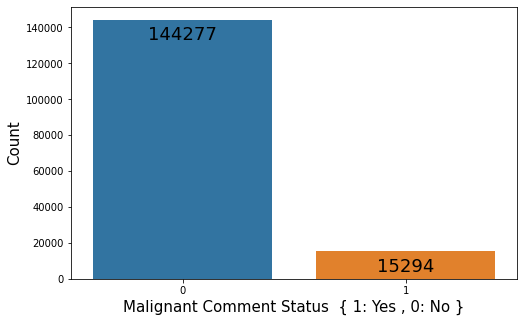

In [51]:
# countplot of  Malignant  comments Status . 
plt.figure(figsize=(8,5))
pd =sns.countplot(x = "malignant" ,  data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -15), 
                   textcoords = 'offset points')
plt.xlabel("Malignant Comment Status  { 1: Yes , 0: No }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

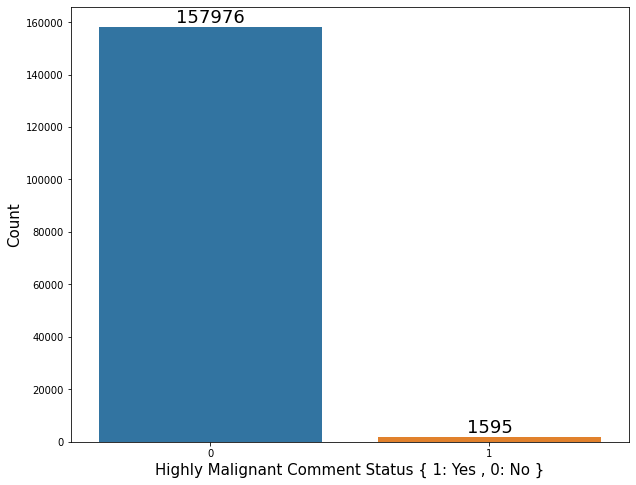

In [52]:
# countplot of Highly Malignant comments status . 
plt.figure(figsize=(10,8))
pd =sns.countplot(x = "highly_malignant" ,  data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, +10), 
                   textcoords = 'offset points')
plt.xlabel("Highly Malignant Comment Status { 1: Yes , 0: No }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

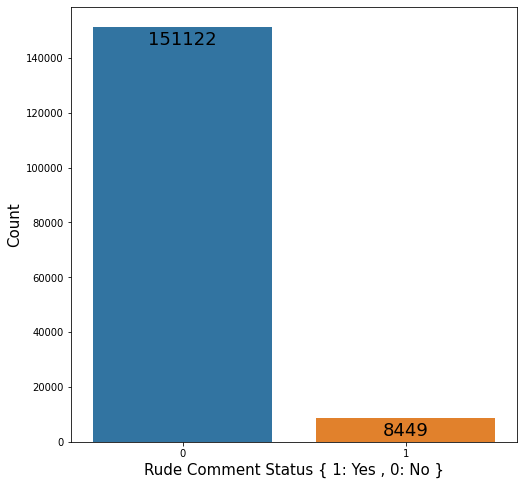

In [53]:
# countplot of Rude comment Status . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "rude" ,  data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Rude Comment Status { 1: Yes , 0: No }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

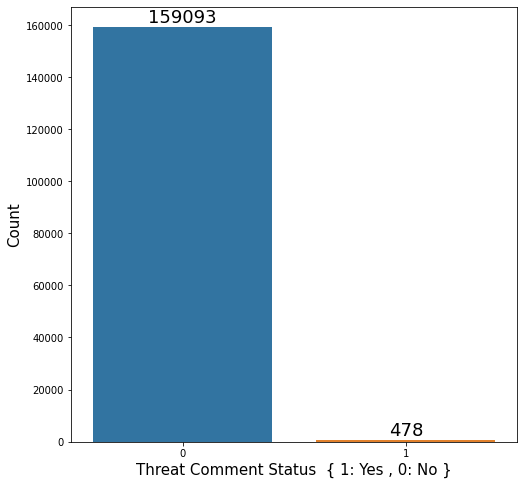

In [54]:
# countplot of Threat Comments Status  . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "threat" ,  data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("Threat Comment Status  { 1: Yes , 0: No }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

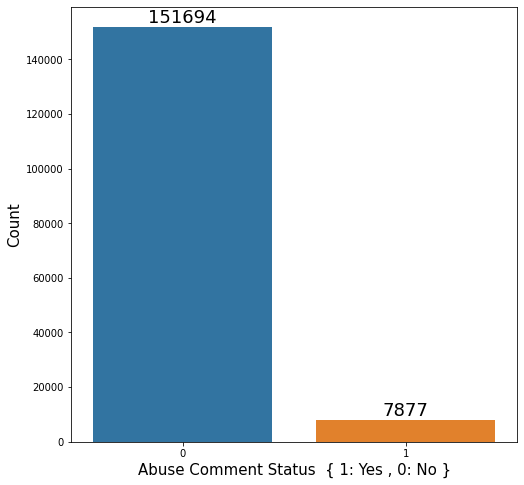

In [55]:
# countplot of  Abuse Comment Status  . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "abuse" ,  data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("Abuse Comment Status  { 1: Yes , 0: No }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

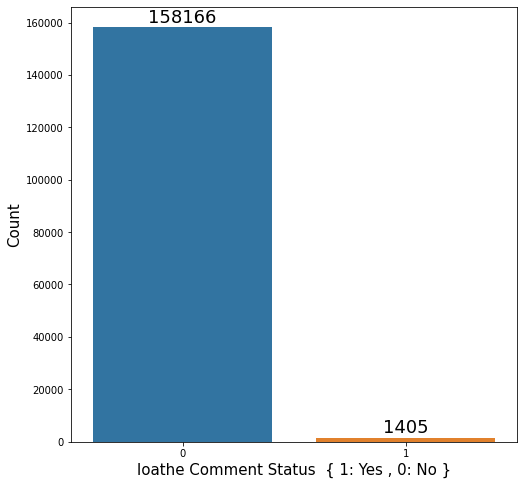

In [56]:
# countplot of loathe Comment Status  . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "loathe" ,  data=Train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("loathe Comment Status  { 1: Yes , 0: No }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

In [57]:
#Now we will  drop column 'id'  from Train and Test database
Train1= Train.drop(["id"],axis = 1)
Test1= Test.drop(["id"],axis = 1)

In [58]:
Train1.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


In [59]:
Test1.head(10)

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
5,Thank you for understanding. I think very high...
6,Please do not add nonsense to Wikipedia. Such ...
7,:Dear god this site is horrible.
8,""" \n Only a fool can believe in such numbers. ..."
9,== Double Redirects == \n\n When fixing double...


In [60]:
# New column of  length  of 'comment_text' column
Train1['length']=Train1.comment_text.str.len()
Train1

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [61]:
Train1['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

# Removing Stop words and other not required words and alphabets from  'comment_text' column of Train1 database 

In [62]:
# Replace email address with 'email'
Train1['comment_text']=Train1['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#ReplaceURLs with 'webaddress'
Train1['comment_text']=Train1['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replace money symbols with 'moneysymb'
Train1['comment_text']=Train1['comment_text'].str.replace(r'£|\$','dollars')

#Replace 10 digit phone number 
Train1['comment_text']=Train1['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
                                                
#Replace numbers with 'numbr'
Train1['comment_text']=Train1['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [63]:
# Remove Punctuation 
Train1['comment_text']=Train1['comment_text'].str.replace(r'[^\w\d\s]',' ')

#Replace Whitspace between terms with  a single space
Train1['comment_text']=Train1['comment_text'].str.replace(r'\s+',' ')

#Remove leading and trailing whitespace
Train1['comment_text']=Train1['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [64]:
Test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [65]:
#Remove Stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') +['u','ur','4','2','im','dont','doin'])
Train1['comment_text'] = Train1['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

# Removing Stop words and other not required words and alphabets from 'comment_text' column of Test database

In [66]:
# Replace email address with 'email'
Test1['comment_text']=Test1['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#ReplaceURLs with 'webaddress'
Test1['comment_text']=Test1['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replace money symbols with 'moneysymb'
Test1['comment_text']=Test1['comment_text'].str.replace(r'£|\$','dollars')

#Replace 10 digit phone number 
Test1['comment_text']=Test1['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
                                                
#Replace numbers with 'numbr'
Test1['comment_text']=Test1['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [67]:
# Remove Punctuation 
Test1['comment_text']=Test1['comment_text'].str.replace(r'[^\w\d\s]',' ')

#Replace Whitspace between terms with  a single space
Test1['comment_text']=Test1['comment_text'].str.replace(r'\s+',' ')

#Remove leading and trailing whitespace
Test1['comment_text']=Test1['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [68]:
#Remove Stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') +['u','ur','4','2','im','dont','doin'])
Test1['comment_text'] = Test1['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [69]:
Test1

,comment_text
0,Yo bitch Ja Rule succesful ever whats hating s...
1,From RfC The title fine IMO
2,Sources Zawe Ashton Lapland
3,If look back source information I updated corr...
4,I anonymously edit articles
...,...
153159,totally agree stuff nothing long crap
153160,Throw field home plate Does get faster throwin...
153161,Okinotorishima categories I see changes agree ...
153162,One founding nations EU Germany Law Return qui...


In [70]:
# New Column (clean_length) after puncuation ,stopwords removal

Train1['clean_length'] = Train1.comment_text.str.len()

#Total Length removal
print('Original Length' , Train1.length.sum())
print('Clean Length',  Train1.clean_length.sum() )

Original Length 62893130
Clean Length 42615013


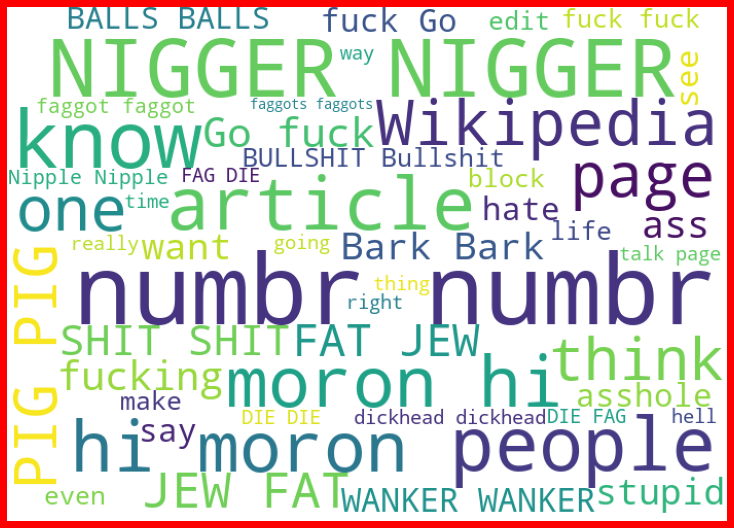

In [71]:
#getting sense of loud words in Comments which are  marked as Malignant

from wordcloud import WordCloud

sp = Train1['comment_text'][Train1['malignant']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

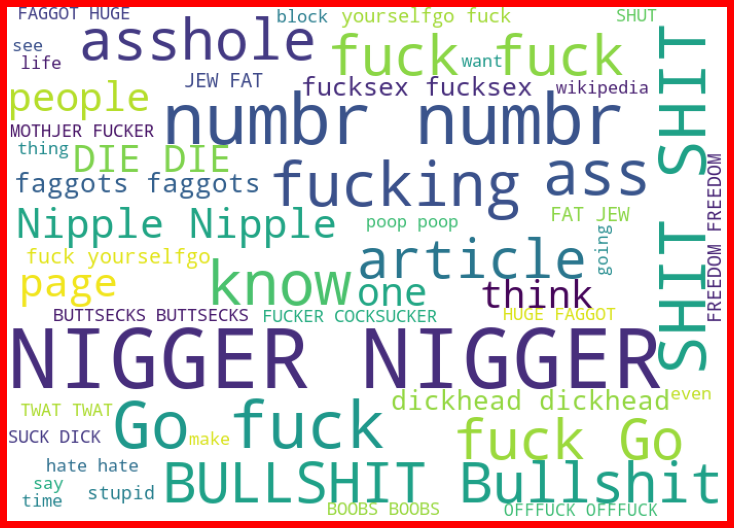

In [72]:
#getting sense of loud words in Comments which are marked as rude.

from wordcloud import WordCloud

sp = Train1['comment_text'][Train1['rude']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

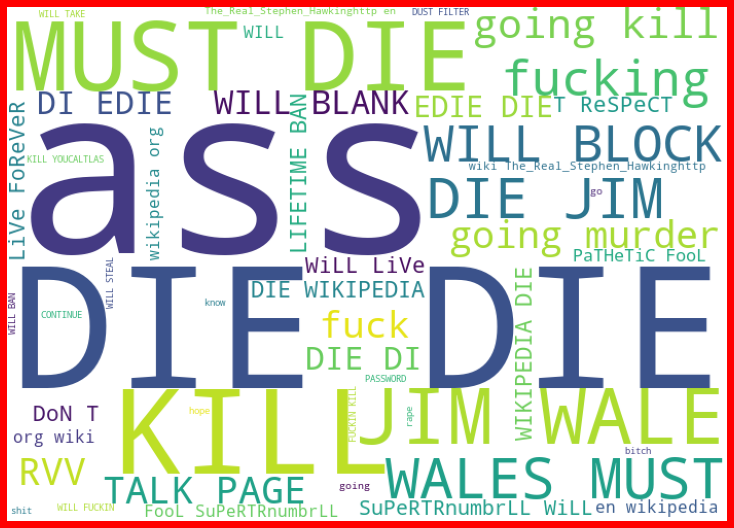

In [73]:
#getting sense of loud words in Comments which are marked as threat.

from wordcloud import WordCloud

sp = Train1['comment_text'][Train1['threat']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

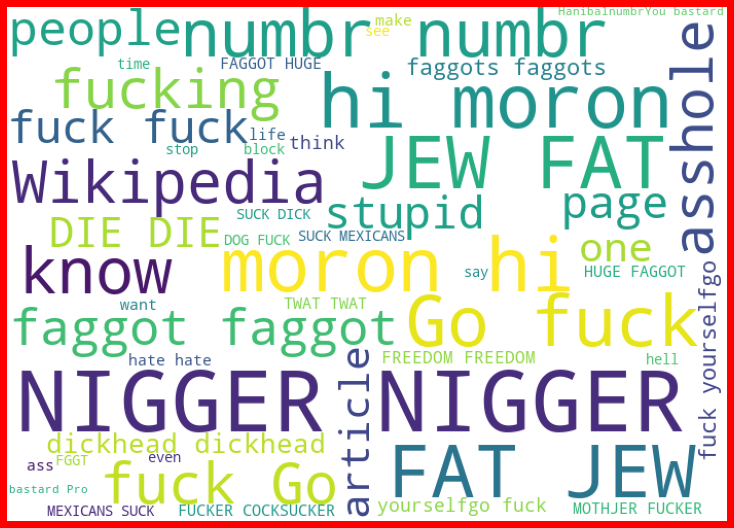

In [74]:
#getting sense of loud words in Comments which are marked as abuse.

from wordcloud import WordCloud

sp = Train1['comment_text'][Train1['abuse']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

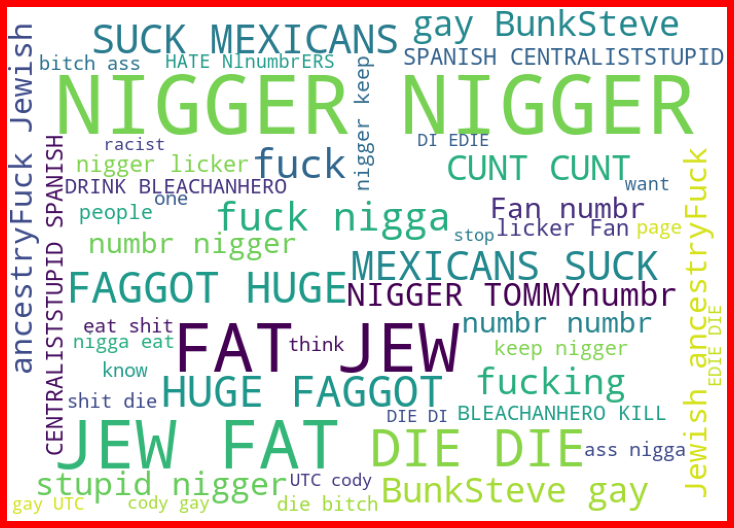

In [75]:
#getting sense of loud words in Comments which are marked as loathe.

from wordcloud import WordCloud

sp = Train1['comment_text'][Train1['loathe']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

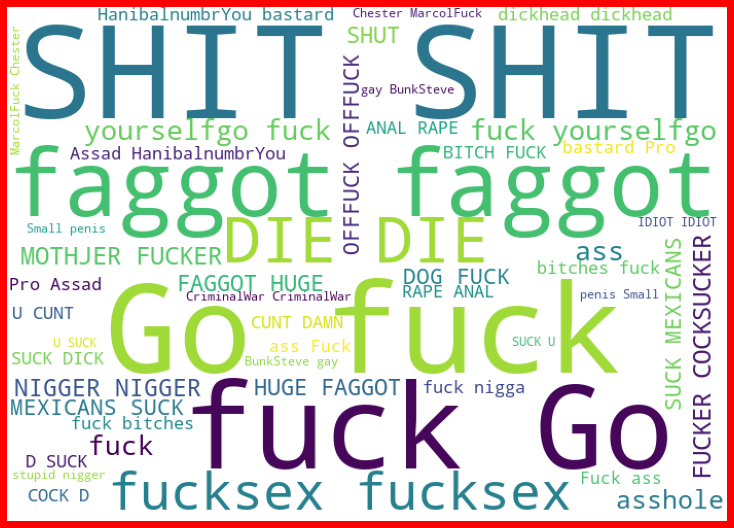

In [76]:
#getting sense of loud words in Comments which are marked as highly_malignant.

from wordcloud import WordCloud

sp = Train1['comment_text'][Train1['highly_malignant']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

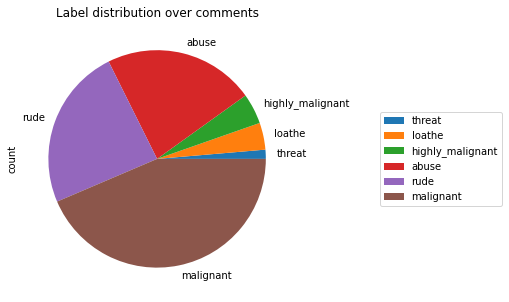

In [77]:
cols_target = ['malignant','threat','abuse','loathe','highly_malignant','rude',]
df_distribution = Train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(8, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [78]:
target_data = Train1[cols_target]

Train1['bad'] =Train1[cols_target].sum(axis =1)
print(Train1['bad'].value_counts())
Train1['bad'] = Train1['bad'] > 0 
Train1['bad'] = Train1['bad'].astype(int)
print(Train1['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


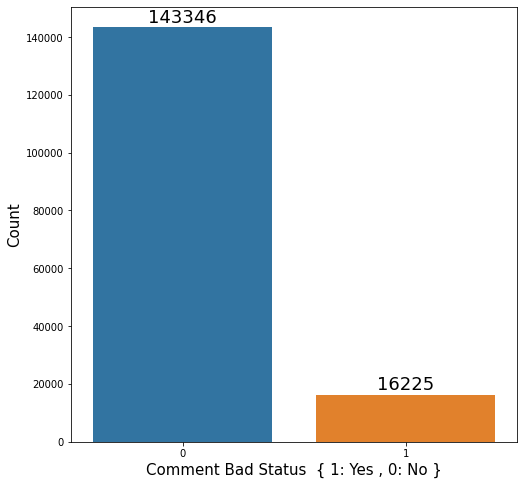

In [79]:
# countplot   Bad Comment Status  . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "bad" ,  data=Train1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("Comment Bad Status  { 1: Yes , 0: No }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

# Coverting Train1['comment_text'] data into  vectors

In [82]:
# 1. convert text into vectors using TF-IDF
# split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

tf_vec= TfidfVectorizer()
features =tf_vec.fit_transform(Train1['comment_text'])

x= features
y= Train1['bad']

In [84]:
x

<159571x180373 sparse matrix of type '<class 'numpy.float64'>'
	with 4696324 stored elements in Compressed Sparse Row format>

# Convert Test1  Data into  Vectors 

In [85]:
tf_vec= TfidfVectorizer()
features1 =tf_vec.fit_transform(Test1['comment_text'])

# Loading necessary libraries

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [87]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state= 42 ,test_size=0.20)

# Using GridSearchCV to select best parameters

In [88]:
#Best parameters for Logistic Regression

print("LogisticRegression")
print("******************" )
print(" ")
lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

LogisticRegression
******************
 
{'penalty': 'l2'}






The model calculation for LogisticRegression() are:
[0 0 0 ... 0 1 0]
Accuracy Score=  0.9548801503994987
The CV Score is 0.9545594111999908

[[28523  1292]
 [  148  1952]]

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     29815
           1       0.60      0.93      0.73      2100

    accuracy                           0.95     31915
   macro avg       0.80      0.94      0.85     31915
weighted avg       0.97      0.95      0.96     31915



roc_auc_score 0.7982821267389928


AxesSubplot(0.125,0.808774;0.62x0.0712264)


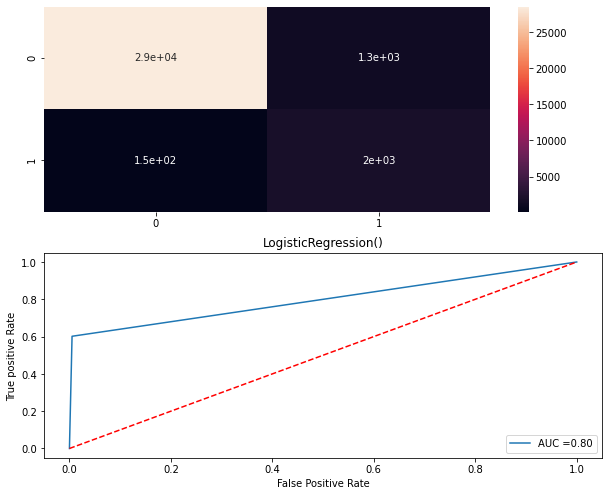

In [89]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [LogisticRegression(penalty="l2" )]:
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")



The model calculation for MultinomialNB() are:
[0 0 0 ... 0 0 0]
Accuracy Score=  0.9180009399968667
The CV Score is 0.9177231465838922

[[28659  2605]
 [   12   639]]

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     31264
           1       0.20      0.98      0.33       651

    accuracy                           0.92     31915
   macro avg       0.60      0.95      0.64     31915
weighted avg       0.98      0.92      0.94     31915



roc_auc_score 0.5982802484205675


AxesSubplot(0.125,0.808774;0.62x0.0712264)


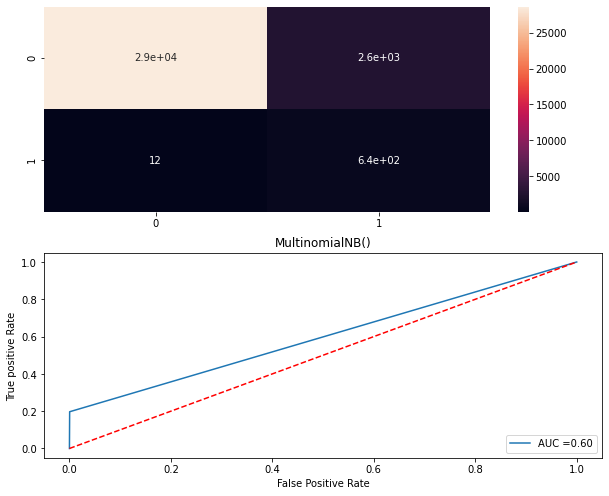

In [90]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [MultinomialNB( )]:
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")

# Since logistic Regression is giving better result so we choose it as final mode

In [91]:
lg=LogisticRegression(penalty="l2")
lg.fit(train_x,train_y)
predict=lg.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(lg,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)

Accuracy Score= 0.9548801503994987
The CV Score is 0.9545594111999908


# Saving the model

In [92]:
import joblib
joblib.dump(lg,"PFA.pkl")

['PFA.pkl']

# Loading Model

In [93]:
model=joblib.load('PFA.pkl')

# Using Model to predict data

In [94]:
db=model.predict(features1)
db

ValueError: X has 236752 features per sample; expecting 180373